In [112]:
import math
import numpy as np
from tqdm import tqdm

In [113]:
def generation_x_y():
    x = np.random.uniform(low=-1, high=1, size=20)
    y = np.sign(x)
    mask = np.arange(0, x.size)
    mask = np.random.uniform(size=20)
    np.random.shuffle(mask)
    threshold = 0.2
    mask = mask < threshold
    y[mask] *= -1
    return x, y

In [114]:

def cal_error(s, theta, x, y):
    result_y = s * np.sign(x - theta)
    return np.sum(result_y != y) / x.size


def E_out(theta, s):
    return 0.5 + 0.3 * s * (np.abs(theta) - 1)


def experiment(x, y):
    parm = {
        "best_error": 100,
        "best_theta": 0,
        "best_s": 1
    }
    arg = np.argsort(x)

    def update_parm(s, theta, parm):
        error = cal_error(s, theta, x, y)
        if error < parm['best_error']:
            parm['best_error'] = error
            parm['best_s'] = s
            parm['best_theta'] = theta

    for i in range(0, arg.size):
        if i + 1 >= arg.size:
            break
        theta = (x[arg[i]] + x[arg[i + 1]]) / 2
        update_parm(1, theta, parm)
        update_parm(-1, theta, parm)
    update_parm(1, x[arg[0]] - 1, parm)
    update_parm(-1, x[arg[0]] - 1, parm)
    return parm, E_out(parm['best_theta'], parm['best_s'])


100%|██████████| 1000/1000 [00:00<00:00, 1572.85it/s][A


Average_E_in: 0.16665
Average_E_out 0.2570413945829088


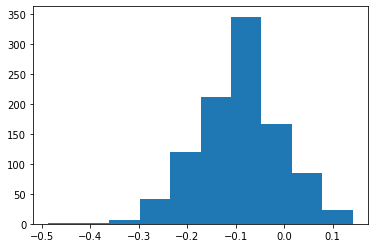

[-1.76905100e-01 -3.32205706e-03  2.87578170e-02 -7.89238077e-03
 -5.08349276e-02 -5.06330129e-02 -1.68456466e-01 -1.54084607e-02
 -2.51990231e-01 -1.44240610e-01 -4.07968943e-01 -1.03726159e-01
 -6.73170663e-02 -2.01565442e-01 -6.04547381e-02 -9.25137130e-02
 -1.25705616e-01 -1.35744996e-01  4.07765479e-02 -1.56193784e-01
 -1.11780419e-01 -9.74180717e-03 -6.93647899e-02 -8.06081813e-06
 -1.17634656e-01 -9.67860596e-02 -1.55393890e-01 -6.45145860e-02
 -1.67033040e-02 -4.19312058e-02 -1.56326945e-01 -3.25224968e-02
 -1.42999422e-01 -1.89823558e-02 -1.55574559e-01 -1.79780723e-01
 -1.91094766e-01 -1.35506477e-03 -1.02936936e-01 -1.73145879e-01
 -1.03047020e-01 -8.38263780e-02 -1.45438432e-01 -2.49375916e-01
 -6.76961488e-02 -1.64221973e-02 -2.33666617e-01  4.10972842e-02
 -5.39569143e-02 -1.08927169e-01 -1.97000660e-01 -5.65339625e-02
 -7.65738251e-02 -5.53126840e-02 -1.74053009e-01 -1.12987520e-01
 -1.32236390e-01 -3.16181369e-01 -6.22900043e-02 -2.88251625e-01
 -5.27345867e-02 -2.29004

In [115]:
iter_time = 1000
dif = np.array([])
total_E_in = 0
total_E_out = 0
for i in tqdm(range(iter_time)):
    x, y = generation_x_y()
    parm, error_out = experiment(x, y)
    total_E_in += parm['best_error']
    total_E_out += error_out
    dif = np.append(dif, [parm['best_error'] - error_out])
print("Average_E_in:", total_E_in / iter_time)
print("Average_E_out", total_E_out / iter_time)
import matplotlib.pyplot as plt

plt.hist(dif)
plt.show()
print(dif)


In [116]:
import wget
import os

train_set_url = "https://www.csie.ntu.edu.tw/~htlin/mooc/datasets/mlfound_math/hw2_train.dat"
test_set_url = "https://www.csie.ntu.edu.tw/~htlin/mooc/datasets/mlfound_math/hw2_test.dat"
if not os.path.exists('hw2_train.dat'):
    wget.download(train_set_url)
    wget.download(test_set_url)
train_set = np.loadtxt('hw2_train.dat')
test_set = np.loadtxt('hw2_test.dat')
best_error = 100
best_theta = 0
best_s = 0
best_column = 0
for i in range(0, train_set.shape[1] - 1):
    parm, _ = experiment(train_set[:, i], train_set[:, -1])
    if parm['best_error'] < best_error:
        best_error = parm['best_error']
        best_theta = parm['best_theta']
        best_s = parm['best_s']
        best_column = i
print(best_error)

E_error = cal_error(best_s, best_theta, test_set[:, best_column], test_set[:, -1])
print(E_error)






0.25
0.355
